In [1]:
# PREPROCESSING
import pandas as pd

# Load Excel file
df = pd.read_excel(r"E:\project\data\raw\stocks.xlsx")

# Show basic info
print("Columns:", df.columns.tolist())
print("\nPreview:")
df.head()

Columns: ['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

Preview:


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [2]:
# Code for Preprocessing and making new features

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel(r"E:\project\data\raw\stocks.xlsx")

# Ensure Date column is datetime (sometimes Excel keeps it as object)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 1. Calculate Log Returns
df['LogReturn'] = np.log(df['Adj Close**'] / df['Adj Close**'].shift(1))

# 2. Volatility (20-day rolling std of returns)
df['Volatility'] = df['LogReturn'].rolling(window=20).std()

# 3. Simple Moving Average (SMA)
df['SMA_20'] = df['Adj Close**'].rolling(window=20).mean()

# 4. Exponential Moving Average (EMA)
df['EMA_20'] = df['Adj Close**'].ewm(span=20, adjust=False).mean()

# 5. Relative Strength Index (RSI, 14-day)
window = 14
delta = df['Adj Close**'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window).mean()
avg_loss = pd.Series(loss).rolling(window=window).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 6. Average True Range (ATR, 14-day)
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Adj Close**'].shift())
low_close = np.abs(df['Low'] - df['Adj Close**'].shift())

tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df['ATR'] = tr.rolling(window=14).mean()

# Drop missing values from rolling calculations
df = df.dropna()

# Save processed data
df.to_csv("E:/project/data/processed/stocks_processed.csv", index=False)

print("Preprocessing done! Processed dataset saved to data/processed/stocks_processed.csv")
print(df.head())

# New dataset with columns : Date, Open, High, Low, Close, Adj Close, Volume, LogReturn, Volatility, SMA_20, EMA_20, RSI, ATR 

Preprocessing done! Processed dataset saved to data/processed/stocks_processed.csv
           Date      Open      High       Low    Close*  Adj Close**  \
1237 2018-05-30  24467.83  24714.48  24459.09  24667.78     24667.78   
1236 2018-05-31  24620.79  24620.79  24352.15  24415.84     24415.84   
1235 2018-06-01  24542.09  24673.60  24542.09  24635.21     24635.21   
1234 2018-06-04  24727.55  24859.37  24722.14  24813.69     24813.69   
1233 2018-06-05  24820.12  24838.78  24710.82  24799.98     24799.98   

         Volume  LogReturn  Volatility     SMA_20        EMA_20        RSI  \
1237  324870000   0.012496    0.007499  24604.041  24601.728905  63.193925   
1236  429740000  -0.010266    0.007705  24628.584  24584.025200  56.086090   
1235  315710000   0.008945    0.007902  24663.837  24588.899943  44.975521   
1234  340400000   0.007219    0.007487  24691.396  24610.308520  44.750423   
1233  306340000  -0.000553    0.007466  24713.529  24628.372470  36.501774   

             AT

All plots saved in ../outputs/figures/


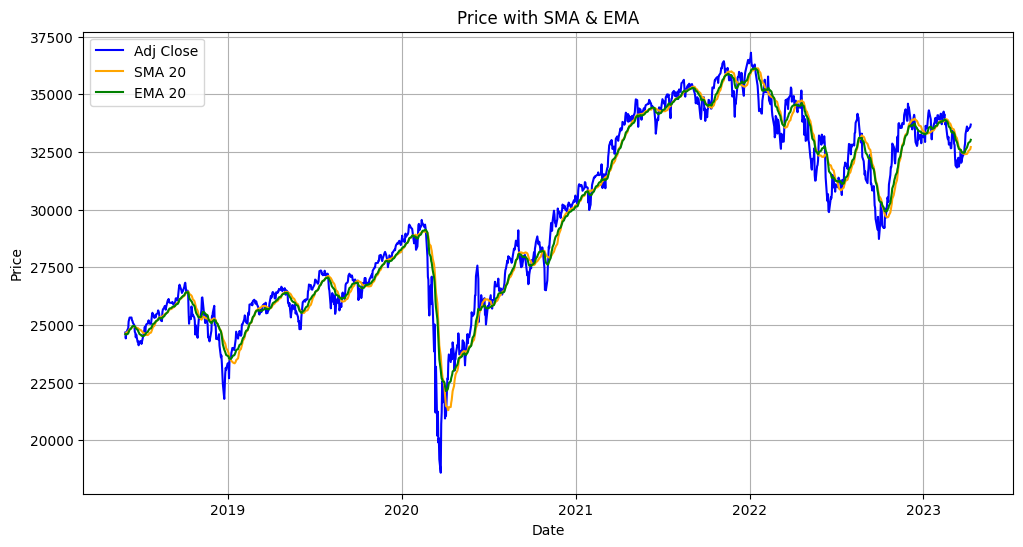

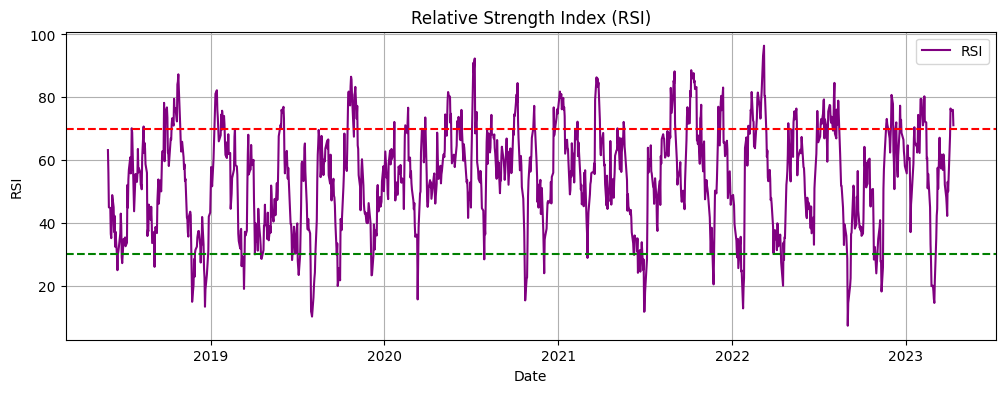

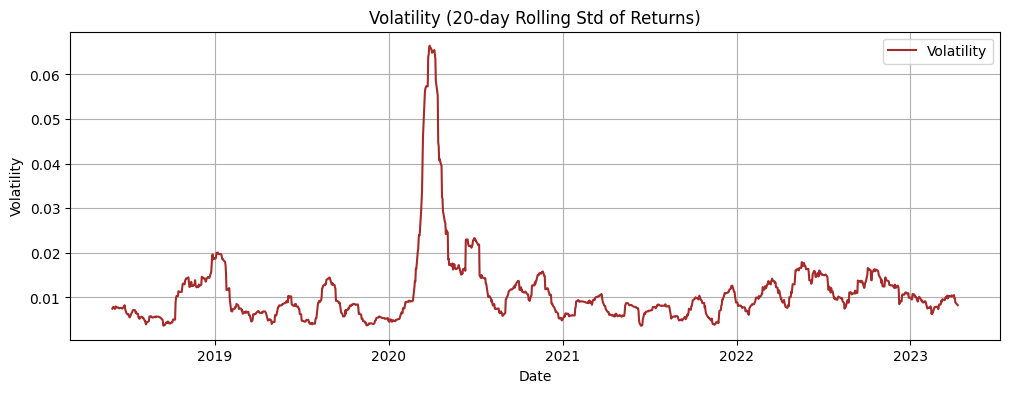

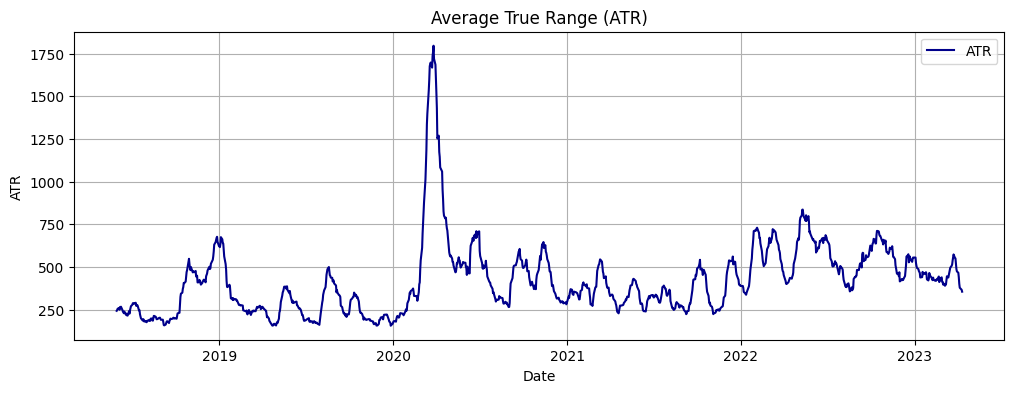

In [3]:
#  Visualizations

# Code for Visualization
import matplotlib.pyplot as plt
import os

# Make sure output folder exists
os.makedirs("E:/project/outputs/figures", exist_ok=True)


# 1. Price with SMA & EMA
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Adj Close**'], label='Adj Close', color='blue')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', color='orange')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='green')
plt.title("Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("E:/project/outputs/figures/price_sma_ema.png") # Auto-Save Plots as PNG
# plt.close() // this will not show your output in here just save figure and close it 

# 2. RSI
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.savefig("E:/project/outputs/figures/rsi.png") # Auto-Save Plots as PNG
# plt.close() // this will not show your output in here just save figure and close it 

# 3. Volatility
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='brown')
plt.title("Volatility (20-day Rolling Std of Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.savefig("E:/project/outputs/figures/volatility.png") # Auto-Save Plots as PNG
# plt.close() // this will not show your output in here just save figure and close it 

# 4. ATR
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['ATR'], label='ATR', color='darkblue')
plt.title("Average True Range (ATR)")
plt.xlabel("Date")
plt.ylabel("ATR")
plt.legend()
plt.grid(True)
plt.savefig("E:/project/outputs/figures/atr.png") # Auto-Save Plots as PNG
# plt.close() // this will not show your output in here just save figure and close it 

print("All plots saved in ../outputs/figures/")

# you can see 4 plots in output and also saved as png in figures folder
# here preprocessing is done.

In [4]:
import os, json
import numpy as np
import pandas as pd

# ---------- Load processed dataset ----------
csv_path = r"E:\project\data\processed\stocks_processed.csv"
df = pd.read_csv(csv_path, parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

# Use Adj Close** as price
price_col = "Adj Close**"

# ---------- Build raw feature frame ----------
X_raw = pd.DataFrame({
    "z_stub_logret": df["LogReturn"],
    "z_stub_vol": df["Volatility"],
    "rsi01": df["RSI"] / 100.0,                       # scale 0-1
    "sma_ratio": df["SMA_20"] / df[price_col],
    "ema_ratio": df["EMA_20"] / df[price_col],
    "atr_ratio": df["ATR"] / df[price_col],
})
dates = df["Date"].to_numpy()

# ---------- Chronological split 70/15/15 ----------
n = len(X_raw)
n_train = int(n * 0.70)
n_val   = int(n * 0.15)
n_test  = n - n_train - n_val

idx_train = slice(0, n_train)
idx_val   = slice(n_train, n_train + n_val)
idx_test  = slice(n_train + n_val, n)

X_tr = X_raw.iloc[idx_train].copy()
X_va = X_raw.iloc[idx_val].copy()
X_te = X_raw.iloc[idx_test].copy()

# ---------- Compute normalization params (train only) ----------
mu_logret = X_tr["z_stub_logret"].mean()
sd_logret = X_tr["z_stub_logret"].std(ddof=0) or 1.0

mu_vol = X_tr["z_stub_vol"].mean()
sd_vol = X_tr["z_stub_vol"].std(ddof=0) or 1.0

def scale_block(df_block):
    out = pd.DataFrame(index=df_block.index)
    out["z_logret"] = (df_block["z_stub_logret"] - mu_logret) / sd_logret
    out["z_vol"]    = (df_block["z_stub_vol"]    - mu_vol)    / sd_vol
    out["rsi01"]    = df_block["rsi01"].clip(0, 1)
    out["sma_ratio"]= df_block["sma_ratio"]
    out["ema_ratio"]= df_block["ema_ratio"]
    out["atr_ratio"]= df_block["atr_ratio"]
    # optional clipping to reduce outlier effect
    out = out.clip(lower=out.quantile(0.01), upper=out.quantile(0.99), axis=1)
    return out

X_train = scale_block(X_tr).to_numpy(dtype=np.float32)
X_val   = scale_block(X_va).to_numpy(dtype=np.float32)
X_test  = scale_block(X_te).to_numpy(dtype=np.float32)

dates_train = dates[idx_train]
dates_val   = dates[idx_val]
dates_test  = dates[idx_test]

# keep price series (for rewards/backtest later)
prices = df[price_col].to_numpy(np.float64)

# ---------- Save to disk ----------
out_dir = r"E:\project\outputs\datasets"
os.makedirs(out_dir, exist_ok=True)

out_npz = os.path.join(out_dir, "states_v1_single_asset.npz")
np.savez(
    out_npz,
    X_train=X_train, X_val=X_val, X_test=X_test,
    dates_train=dates_train.astype("datetime64[D]"),
    dates_val=dates_val.astype("datetime64[D]"),
    dates_test=dates_test.astype("datetime64[D]"),
    prices=prices
)

meta = {
    "price_col": price_col,
    "feature_order": ["z_logret","z_vol","rsi01","sma_ratio","ema_ratio","atr_ratio"],
    "split": {"n": int(n), "n_train": int(n_train), "n_val": int(n_val), "n_test": int(n_test)},
    "scaler": {"mu_logret": float(mu_logret), "sd_logret": float(sd_logret),
               "mu_vol": float(mu_vol), "sd_vol": float(sd_vol)},
}
with open(os.path.join(out_dir, "state_config.json"), "w") as f:
    json.dump(meta, f, indent=2, default=str)

print("Step complete")
print("X_train shape:", X_train.shape, "| X_val:", X_val.shape, "| X_test:", X_test.shape)
print("Saved:", out_npz)

Step complete
X_train shape: (857, 6) | X_val: (183, 6) | X_test: (185, 6)
Saved: E:\project\outputs\datasets\states_v1_single_asset.npz
